
## Exploratory Data Analysis (EDA) of Viking Artifacts Dataset

This notebook presents an exploratory data analysis of a dataset containing information about Viking artifacts.


The questions I want to explore are: 
1. Where were these artifacts found?
2. What durable materials did Scandinavians use in the Viking Age?
3. What types of weapons did Vikings use in raiding?
4. When were these artifacts uncovered?

In [88]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [89]:

# Load the dataset
war_dataset = pd.read_csv('/Users/aly.milne/Library/CloudStorage/OneDrive-BrighamYoungUniversity/Fall 2023/STAT 386/ST386_Final_Project/Scraped_Data/war_translated.csv')
trade_dataset = pd.read_csv('/Users/aly.milne/Library/CloudStorage/OneDrive-BrighamYoungUniversity/Fall 2023/STAT 386/ST386_Final_Project/Scraped_Data/trade_translated.csv')



### Basic Overview of the War Dataset


In [90]:
# The regular expression '\d+' extracts one or more digits
war_dataset['Era Start Year'] = war_dataset['Era Start Year'].str.extract('(\d+)')

# Convert the extracted numbers to a numeric datatype
war_dataset['Era Start Year'] = pd.to_numeric(war_dataset['Era Start Year'])

# Step 1: Select non-object columns
non_object_columns = list(war_dataset.select_dtypes(exclude=['object']).columns)


# Step 2: Select object columns that end with '_Translated'
object_translated_columns = list(war_dataset.select_dtypes(include=['object']).filter(like='_translated').columns)
additional_columns = ["Unique Name", "Museum", ]  # Replace with your column names
object_translated_columns.extend(additional_columns)


# Step 3: Combine both lists using list concatenation
final_columns = non_object_columns + object_translated_columns

# Step 4: Select these columns from the dataframe
war_df = war_dataset[final_columns]

In [91]:
# The regular expression '\d+' extracts one or more digits
# trade_dataset['Era Start Year'] = trade_dataset['Era Start Year'].str.extract('(\d+)')

# Convert the extracted numbers to a numeric datatype
trade_dataset['Era Start Year'] = pd.to_numeric(trade_dataset['Era Start Year'])

# Step 1: Select non-object columns
non_object_columns = list(trade_dataset.select_dtypes(exclude=['object']).columns)

# Step 2: Select object columns that end with '_Translated'
object_translated_columns = list(trade_dataset.select_dtypes(include=['object']).filter(like='_translated').columns)
additional_columns = ["Unique Name", "Museum", ]  # Replace with your column names
object_translated_columns.extend(additional_columns)


# Step 3: Combine both lists using list concatenation
final_columns = non_object_columns + object_translated_columns

# Step 4: Select these columns from the dataframe
trade_df = trade_dataset[final_columns]

In [92]:
trade_basic_overview = {
    "Number of Rows": trade_df.shape[0],
    "Number of Columns": trade_df.shape[1],
    "Data Types": trade_df.dtypes
}
trade_basic_overview

{'Number of Rows': 256,
 'Number of Columns': 42,
 'Data Types': Förvärvsnr.                       float64
 Antal                             float64
 Förvärvsnummer                    float64
 Förvärvsdatum                     float64
 latitude                          float64
 longitude                         float64
 historisk_plats_latitude          float64
 historisk_plats_longitude         float64
 Era Start Year                      int64
 Era End Year                        int64
 Width                             float64
 Length                            float64
 Thickness                         float64
 Diameter                          float64
 Weight                            float64
 year_uncovered                    float64
 Föremålsbenämning_translated       object
 Föremålsnr._translated             object
 Andra nummer_translated            object
 Material_translated                object
 Plats_translated                   object
 Fornlämning_translated          

In [93]:

war_basic_overview = {
    "Number of Rows": war_df.shape[0],
    "Number of Columns": war_df.shape[1],
    "Data Types": war_df.dtypes
}
war_basic_overview


{'Number of Rows': 464,
 'Number of Columns': 43,
 'Data Types': Förvärvsnr.                       float64
 Antal                             float64
 Förvärvsnummer                    float64
 Förvärvsdatum                     float64
 Antal fragment                    float64
 plats_latitude                    float64
 plats_longitude                   float64
 historisk_plats_latitude          float64
 historisk_plats_longitude         float64
 Era Start Year                    float64
 Era End Year                      float64
 Width                             float64
 Length                            float64
 Thickness                         float64
 Diameter                          float64
 Weight                            float64
 year_uncovered                    float64
 Föremålsbenämning_translated       object
 Föremålsnr._translated             object
 Andra nummer_translated            object
 Material_translated                object
 Plats_translated                


### Summary Statistics and Missing Values Analysis


In [94]:
# Summary Statistics for Numerical Data
war_numerical_summary = war_df.describe()

war_numerical_summary

,Förvärvsnr.,Antal,Förvärvsnummer,Förvärvsdatum,Antal fragment,plats_latitude,plats_longitude,historisk_plats_latitude,historisk_plats_longitude,Era Start Year,Era End Year,Width,Length,Thickness,Diameter,Weight,year_uncovered
count,458.000000,436.000000,458.000000,458.000000,192.000000,118.000000,118.000000,1.510000e+02,1.510000e+02,463.000000,463.000000,69.000000,125.000000,33.000000,8.000000,76.000000,242.000000
mean,26689.157205,1.793578,26689.157205,1967.421397,7.979167,55.380302,13.870239,4.631448e+01,1.104803e+01,796.652268,1106.911447,120.228986,340.884800,18.484848,76.750000,145.803947,1906.157025
std,10882.315019,3.355360,10882.315019,49.776429,10.984024,9.629321,14.260717,1.853559e-13,4.099217e-14,29.325425,45.533950,273.710637,338.131671,43.992983,71.858492,323.771644,49.129688
min,432.000000,1.000000,432.000000,1820.000000,1.000000,-5.220006,-71.800061,4.631448e+01,1.104803e+01,500.000000,1100.000000,8.000000,13.000000,1.000000,4.000000,1.000000,1826.000000
25%,17343.000000,1.000000,17343.000000,1923.000000,1.000000,46.314475,11.048029,4.631448e+01,1.104803e+01,800.000000,1100.000000,29.000000,76.000000,4.000000,11.750000,3.000000,1878.000000
50%,34000.000000,1.000000,34000.000000,2000.000000,3.000000,58.050810,16.093554,4.631448e+01,1.104803e+01,800.000000,1100.000000,90.000000,140.000000,10.000000,74.500000,11.000000,1879.000000
75%,34000.000000,1.000000,34000.000000,2000.000000,10.250000,60.317277,18.239923,4.631448e+01,1.104803e+01,800.000000,1100.000000,100.000000,685.000000,16.000000,142.500000,54.500000,1888.000000
max,35000.000000,40.000000,35000.000000,2011.000000,69.000000,67.588819,120.217395,4.631448e+01,1.104803e+01,800.000000,1500.000000,2100.000000,990.000000,260.000000,150.000000,1316.000000,1995.000000


In [95]:
# Summary Statistics for Numerical Data
trade_numerical_summary = trade_df.describe()

trade_numerical_summary

,Förvärvsnr.,Antal,Förvärvsnummer,Förvärvsdatum,latitude,longitude,historisk_plats_latitude,historisk_plats_longitude,Era Start Year,Era End Year,Width,Length,Thickness,Diameter,Weight,year_uncovered
count,255.000000,241.000000,255.000000,255.000000,119.000000,119.000000,1.220000e+02,1.220000e+02,256.0,256.000000,73.000000,52.000000,77.000000,102.000000,171.000000,126.000000
mean,31964.368627,6.601660,31964.368627,1993.196078,57.723481,18.402923,4.631448e+01,1.104803e+01,800.0,1101.757812,42.383562,88.153846,17.077922,56.136275,79.919357,1917.801587
std,6982.834859,79.729223,6982.834859,32.066012,2.433780,1.624669,1.212904e-13,2.497155e-14,0.0,16.174173,146.376453,138.496108,45.775774,24.631417,250.698949,53.737141
min,1985.000000,1.000000,1985.000000,1853.000000,46.314475,11.048029,4.631448e+01,1.104803e+01,800.0,1100.000000,4.000000,8.000000,2.000000,3.000000,0.100000,1875.000000
25%,33759.000000,1.000000,33759.000000,2000.000000,57.728060,18.754209,4.631448e+01,1.104803e+01,800.0,1100.000000,4.500000,27.500000,4.000000,47.500000,7.600000,1879.000000
50%,34000.000000,1.000000,34000.000000,2002.000000,57.728060,18.754209,4.631448e+01,1.104803e+01,800.0,1100.000000,6.000000,47.000000,5.500000,63.500000,42.760000,1881.000000
75%,34000.000000,1.000000,34000.000000,2002.000000,57.728060,18.754209,4.631448e+01,1.104803e+01,800.0,1100.000000,11.000000,82.500000,9.000000,73.000000,84.005000,1990.000000
max,35000.000000,1238.000000,35000.000000,2011.000000,67.522750,23.435748,4.631448e+01,1.104803e+01,800.0,1250.000000,800.000000,790.000000,327.000000,120.000000,2950.000000,1994.000000


In [96]:

# Missing Values Analysis
trade_missing_values = trade_df.isnull().sum()

trade_missing_values


Förvärvsnr.                         1
Antal                              15
Förvärvsnummer                      1
Förvärvsdatum                       1
latitude                          137
longitude                         137
historisk_plats_latitude          134
historisk_plats_longitude         134
Era Start Year                      0
Era End Year                        0
Width                             183
Length                            204
Thickness                         179
Diameter                          154
Weight                             85
year_uncovered                    130
Föremålsbenämning_translated        0
Föremålsnr._translated              0
Andra nummer_translated             0
Material_translated                 2
Plats_translated                    3
Fornlämning_translated             18
Socken_translated                   2
Landskap_translated                 1
Land_translated                     0
Kontexttyp_translated              21
Kontextnr._t

In [97]:

# Missing Values Analysis
war_missing_values = war_df.isnull().sum()

war_missing_values


Förvärvsnr.                         6
Antal                              28
Förvärvsnummer                      6
Förvärvsdatum                       6
Antal fragment                    272
plats_latitude                    346
plats_longitude                   346
historisk_plats_latitude          313
historisk_plats_longitude         313
Era Start Year                      1
Era End Year                        1
Width                             395
Length                            339
Thickness                         431
Diameter                          456
Weight                            388
year_uncovered                    222
Föremålsbenämning_translated        0
Föremålsnr._translated              0
Andra nummer_translated             0
Material_translated                 1
Plats_translated                   21
Fornlämning_translated             98
Socken_translated                  13
Landskap_translated                 9
Land_translated                     0
Kontexttyp_t


### Categorical Data Analysis



### Visualizations


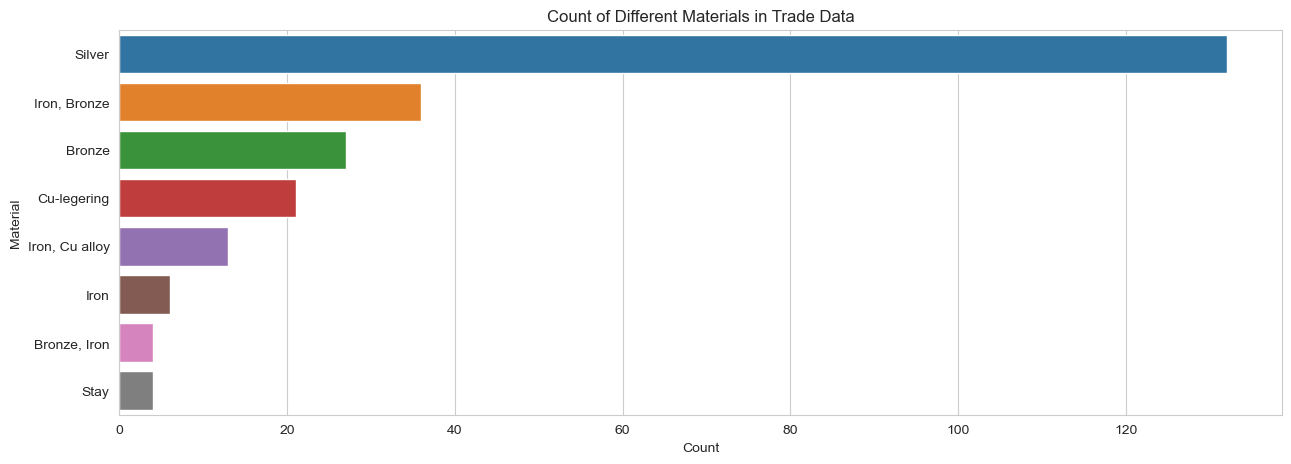

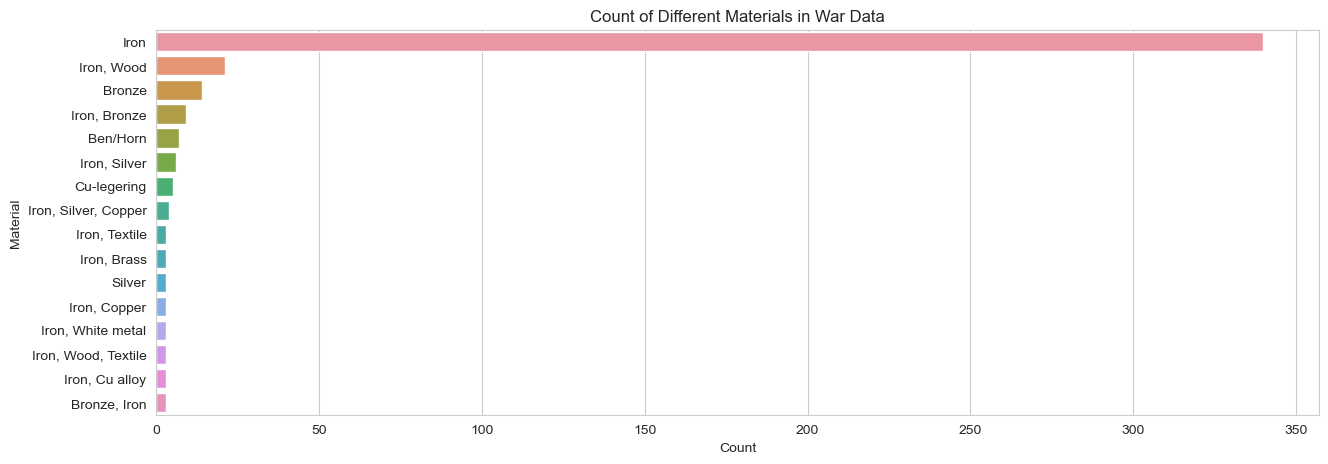

In [131]:
# Function to create plots with material frequency filtering
def create_filtered_plots(data, title, threshold):
    # Counting the occurrences of each material
    material_counts = data['Material_translated'].value_counts()

    # Identifying materials with count >= threshold
    materials_to_plot = material_counts[material_counts >= threshold].index

    # Filtering the data for plotting
    data_to_plot = data[data['Material_translated'].isin(materials_to_plot)]

    # Plotting
    plt.figure(figsize=(15, 5))
    sns.countplot(y=data_to_plot['Material_translated'], order=data_to_plot['Material_translated'].value_counts().index)
    plt.title(f'Count of Different Materials in {title}')
    plt.xlabel('Count')
    plt.ylabel('Material')
    plt.show()

# Creating plots for the Trade Data with filtered materials
create_filtered_plots(trade_df, 'Trade Data', threshold=3)

# Creating plots for the War Data with filtered materials
create_filtered_plots(war_df, 'War Data', threshold=3)

Silver is most common for trade items and iron is most common for war items. This makes sense as Vikings were known to trade 'hacksilver' which were bracelets and other trinkets measured by weight.

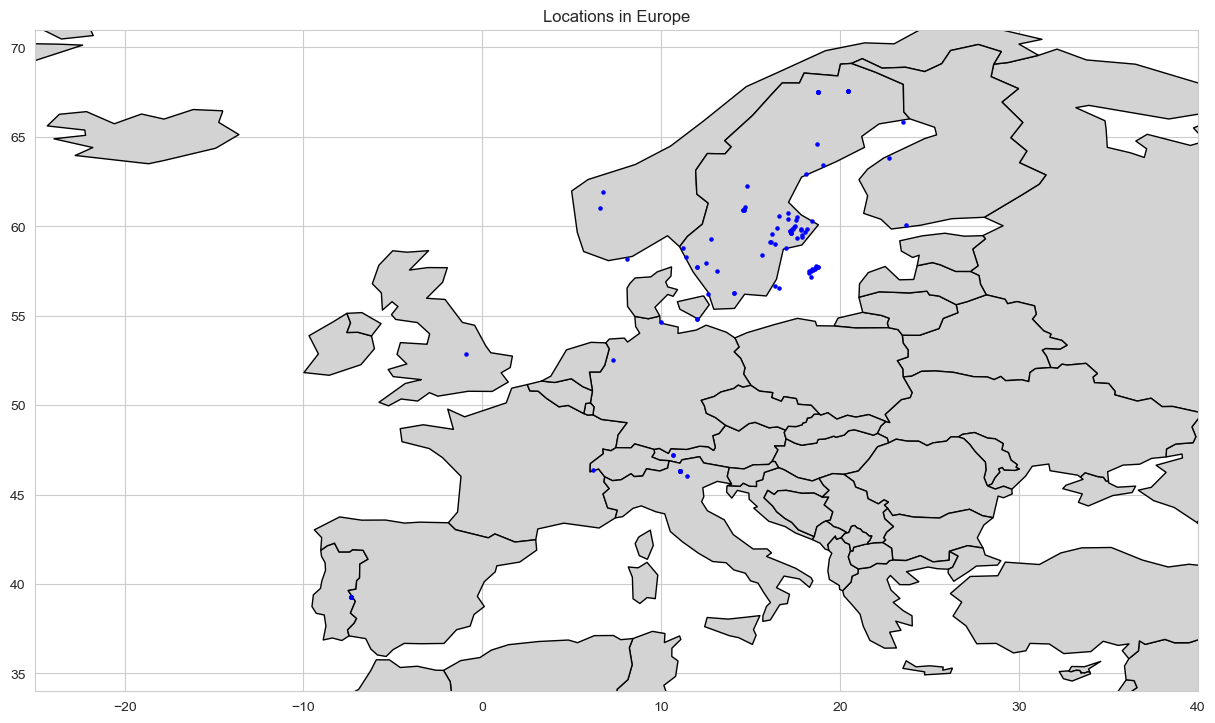

In [100]:
import geopandas as gpd
from shapely.geometry import Point

# Filter out rows where latitude or longitude is missing
df_filtered = war_df.dropna(subset=['plats_latitude', 'plats_longitude'])

# Convert DataFrame to GeoDataFrame
geometry = [Point(xy) for xy in zip(df_filtered['plats_longitude'], df_filtered['plats_latitude'])]
geo_df = gpd.GeoDataFrame(df_filtered, geometry=geometry)

# World basemap
world = gpd.read_file('/Users/aly.milne/Library/CloudStorage/OneDrive-BrighamYoungUniversity/Fall 2023/STAT 386/ST386_Final_Project/EDA_Stuff/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

# Setting boundaries for Europe
# These are approximate and can be adjusted as needed
europe_bounds = {
    "min_lon": -25.0,  # Min longitude
    "max_lon": 40.0,   # Max longitude
    "min_lat": 34.0,   # Min latitude
    "max_lat": 71.0    # Max latitude
}

# Plotting with Europe focus
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgrey', edgecolor='black')
geo_df.plot(ax=ax, color='blue', markersize=5)

# Setting the limits to zoom in on Europe
ax.set_xlim(europe_bounds["min_lon"], europe_bounds["max_lon"])
ax.set_ylim(europe_bounds["min_lat"], europe_bounds["max_lat"])

plt.title('Locations in Europe for War Objects')
plt.show()

Most war objects were found in Sweden, but some came all the way from Portugal/Spain!

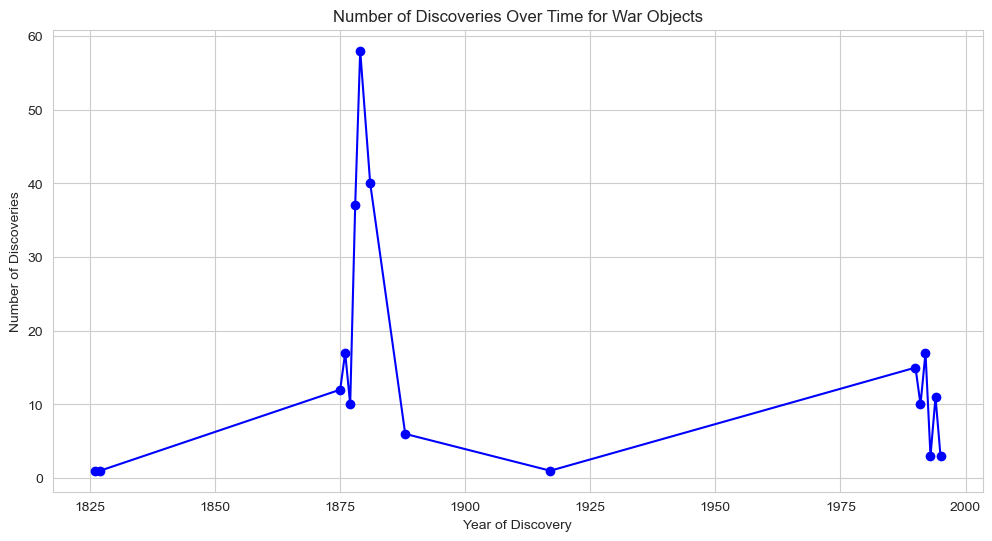

In [132]:
# Grouping the data by year and counting the number of discoveries
yearly_data = war_df.groupby('year_uncovered').size()

# Creating the time series plot
plt.figure(figsize=(12, 6))
yearly_data.plot(kind='line', color='blue', marker='o')
plt.title('Number of Discoveries Over Time for War Objects')
plt.xlabel('Year of Discovery')
plt.ylabel('Number of Discoveries')
plt.grid(True)
plt.show()


There was a spike in war artifacts found around 1880. I'd be interested to see if there was one particular dig that uncovered a lot.

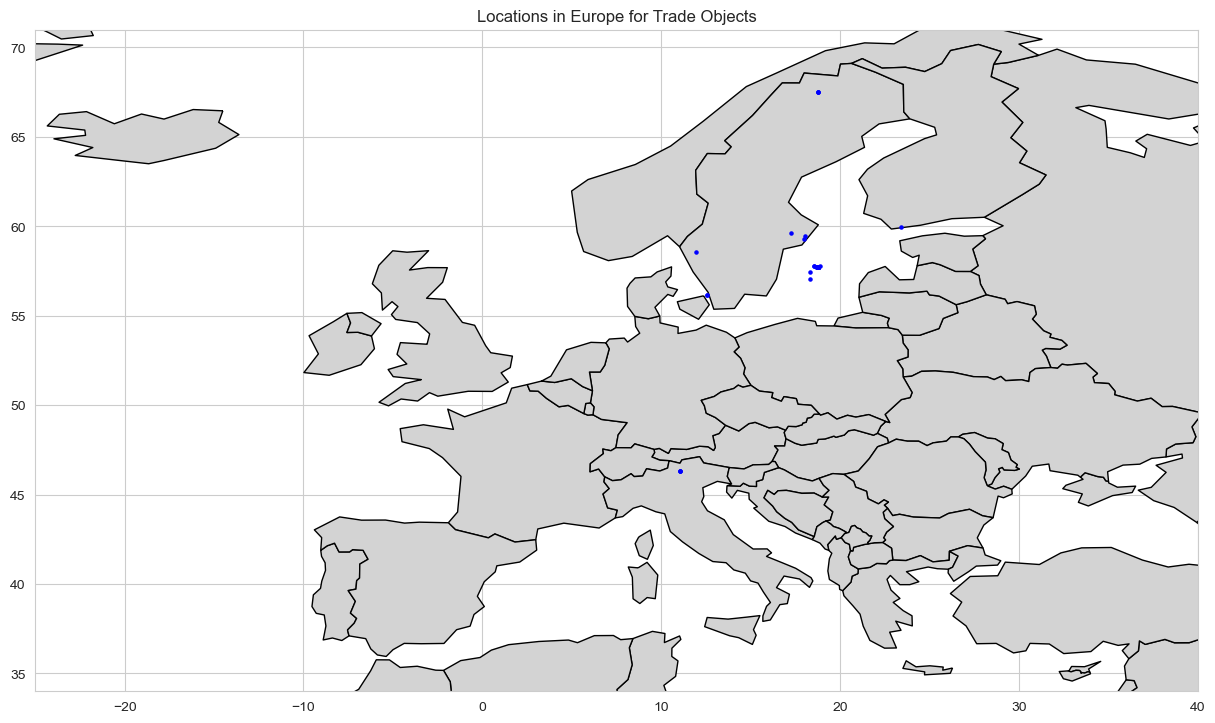

In [104]:
# Filter out rows where latitude or longitude is missing
df_filtered = trade_df.dropna(subset=['latitude', 'longitude'])

# Convert DataFrame to GeoDataFrame
geometry = [Point(xy) for xy in zip(df_filtered['longitude'], df_filtered['latitude'])]
geo_df = gpd.GeoDataFrame(df_filtered, geometry=geometry)

# Plotting with Europe focus
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgrey', edgecolor='black')
geo_df.plot(ax=ax, color='blue', markersize=5)

# Setting the limits to zoom in on Europe
ax.set_xlim(europe_bounds["min_lon"], europe_bounds["max_lon"])
ax.set_ylim(europe_bounds["min_lat"], europe_bounds["max_lat"])

plt.title('Locations in Europe for Trade Objects')
plt.show()

Most trade objects found in Sweden, which makes sense since hacksilver was a Scandinavian tradition and other peoples might not have seen the value in it.

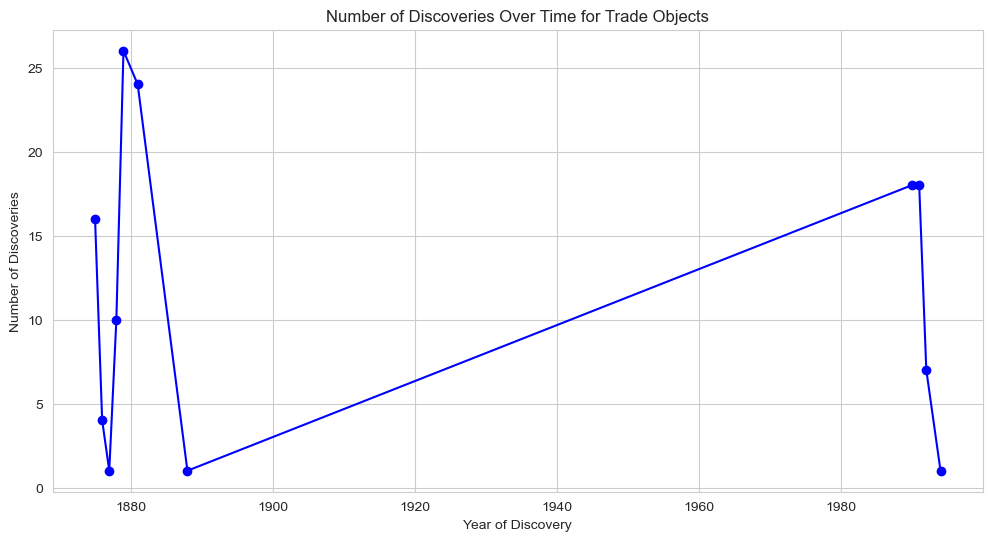

In [105]:
# Grouping the data by year and counting the number of discoveries
yearly_data = trade_df.groupby('year_uncovered').size()

# Creating the time series plot
plt.figure(figsize=(12, 6))
yearly_data.plot(kind='line', color='blue', marker='o')
plt.title('Number of Discoveries Over Time for Trade Objects')
plt.xlabel('Year of Discovery')
plt.ylabel('Number of Discoveries')
plt.grid(True)
plt.show()

Once again, a big spike around 1880. I'll see what data I have to uncover if this was in one dig.

## Additional Exploration

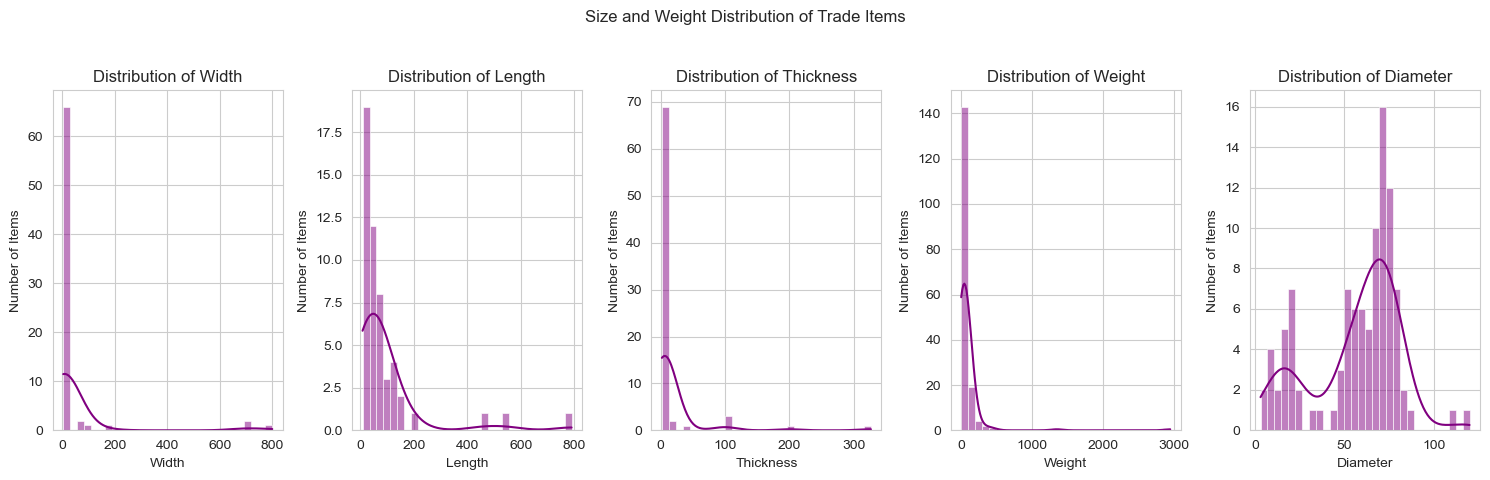

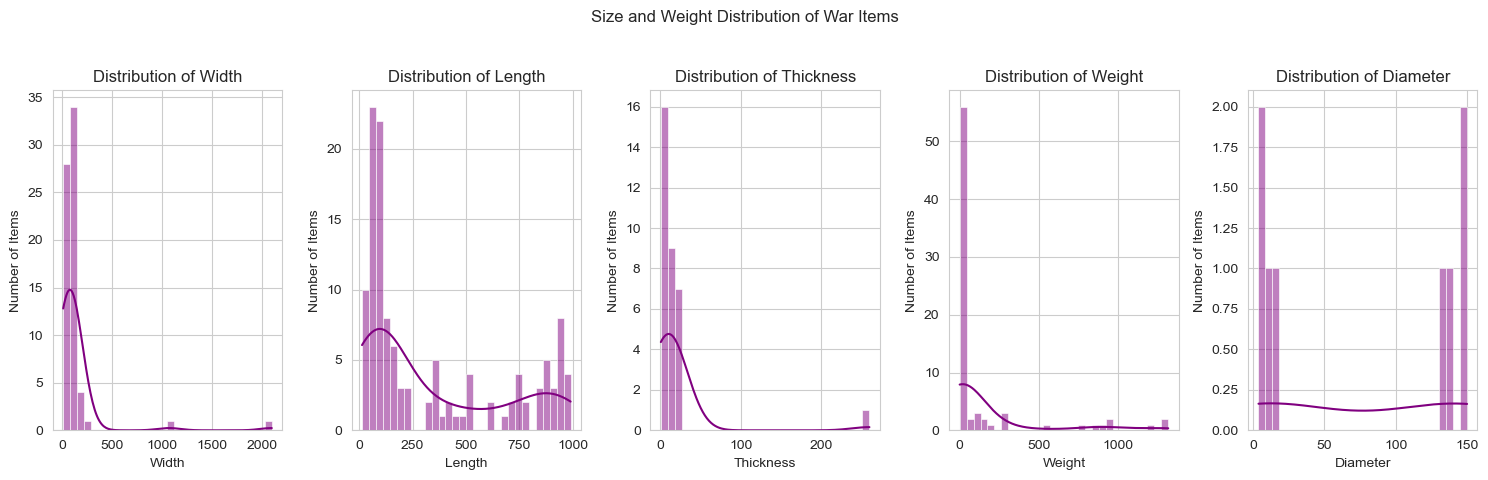

In [106]:
# Function to plot size and weight distribution
def plot_size_weight_distribution(df, columns, title):
    fig, axes = plt.subplots(1, len(columns), figsize=(15, 5))
    fig.suptitle(title)

    for i, col in enumerate(columns):
        sns.histplot(df[col], bins=30, kde=True, ax=axes[i], color='purple')
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Number of Items')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Columns to analyze
size_weight_columns = ['Width', 'Length', 'Thickness', 'Weight', 'Diameter']

# Plotting size and weight distribution for both datasets
plot_size_weight_distribution(trade_df, size_weight_columns, 'Size and Weight Distribution of Trade Items')
plot_size_weight_distribution(war_df, size_weight_columns, 'Size and Weight Distribution of War Items')


I just thought it would be interesting to see the dimensions of the objects graphed.

/var/folders/dj/qctfv2js3tv4x3126wmntr3h0000gp/T/ipykernel_33401/2328166711.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['year_uncovered'] = df_cleaned['year_uncovered'].astype(int)


<Figure size 1500x800 with 0 Axes>

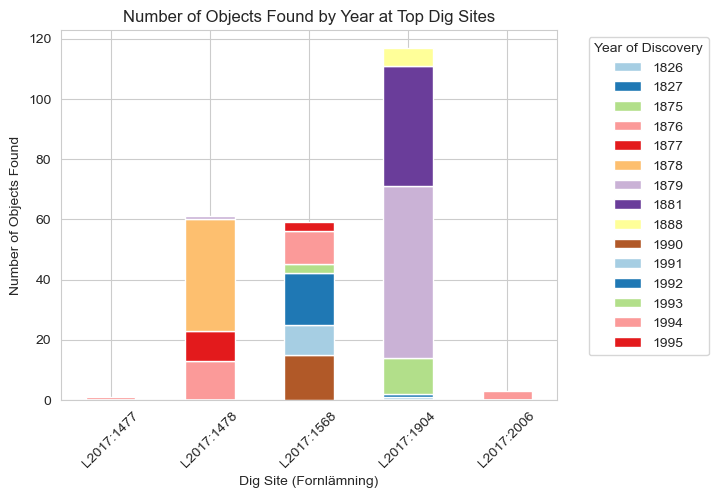

In [128]:
from matplotlib.colors import ListedColormap
import numpy as np

# Dropping rows where 'year_uncovered' is NaN and converting to integer
df_cleaned = war_df.dropna(subset=['year_uncovered'])
df_cleaned['year_uncovered'] = df_cleaned['year_uncovered'].astype(int)

# Summing up the total number of objects found at each site
total_objects_per_site = df_cleaned.groupby('Fornlämning_translated').size()

# Identifying the top N sites
top_n_sites = 5  # Adjust the number of sites as needed
top_sites = total_objects_per_site.nlargest(top_n_sites).index

# Filtering the data for these top sites
top_sites_data = df_cleaned[df_cleaned['Fornlämning_translated'].isin(top_sites)]

# Grouping the data for the top sites
top_sites_grouped = top_sites_data.groupby(['Fornlämning_translated', 'year_uncovered']).size().unstack(fill_value=0)

# Selecting a qualitative colormap
base_colormap = plt.colormaps['Paired']  # Updated method to get colormap
num_years = len(top_sites_grouped.columns)
colors = base_colormap(np.linspace(0, 1, 10))  # 'tab10' has 10 colors

# If there are more years than colors, repeat the colors in a cycle
if num_years > 10:
    repeat_factor = int(np.ceil(num_years / 10))
    colors = np.tile(colors, (repeat_factor, 1))

# Creating the custom colormap
custom_colormap = ListedColormap(colors[:num_years])

# Creating the stacked bar chart with the custom colormap
plt.figure(figsize=(15, 8))
top_sites_grouped.plot(kind='bar', stacked=True, colormap=custom_colormap)
plt.title('Number of Objects Found by Year at Top Dig Sites')
plt.xlabel('Dig Site (Fornlämning)')
plt.ylabel('Number of Objects Found')
plt.legend(title='Year of Discovery', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

/var/folders/dj/qctfv2js3tv4x3126wmntr3h0000gp/T/ipykernel_33401/2112423417.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['year_uncovered'] = df_cleaned['year_uncovered'].astype(int)


<Figure size 1500x800 with 0 Axes>

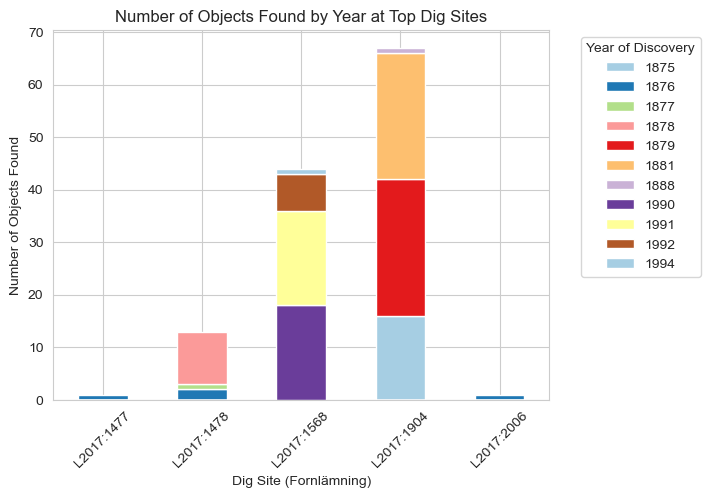

In [129]:
from matplotlib.colors import ListedColormap
import numpy as np

# Dropping rows where 'year_uncovered' is NaN and converting to integer
df_cleaned = trade_df.dropna(subset=['year_uncovered'])
df_cleaned['year_uncovered'] = df_cleaned['year_uncovered'].astype(int)

# Summing up the total number of objects found at each site
total_objects_per_site = df_cleaned.groupby('Fornlämning_translated').size()

# Identifying the top N sites
top_n_sites = 5  # Adjust the number of sites as needed
top_sites = total_objects_per_site.nlargest(top_n_sites).index

# Filtering the data for these top sites
top_sites_data = df_cleaned[df_cleaned['Fornlämning_translated'].isin(top_sites)]

# Grouping the data for the top sites
top_sites_grouped = top_sites_data.groupby(['Fornlämning_translated', 'year_uncovered']).size().unstack(fill_value=0)

# Selecting a qualitative colormap
base_colormap = plt.colormaps['Paired']  # Updated method to get colormap
num_years = len(top_sites_grouped.columns)
colors = base_colormap(np.linspace(0, 1, 10))  # 'tab10' has 10 colors

# If there are more years than colors, repeat the colors in a cycle
if num_years > 10:
    repeat_factor = int(np.ceil(num_years / 10))
    colors = np.tile(colors, (repeat_factor, 1))

# Creating the custom colormap
custom_colormap = ListedColormap(colors[:num_years])

# Creating the stacked bar chart with the custom colormap
plt.figure(figsize=(15, 8))
top_sites_grouped.plot(kind='bar', stacked=True, colormap=custom_colormap)
plt.title('Number of Objects Found by Year at Top Dig Sites')
plt.xlabel('Dig Site (Fornlämning)')
plt.ylabel('Number of Objects Found')
plt.legend(title='Year of Discovery', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

It looks like for both groups there were big digs at location L2017:1904 in 1879 and 1881.

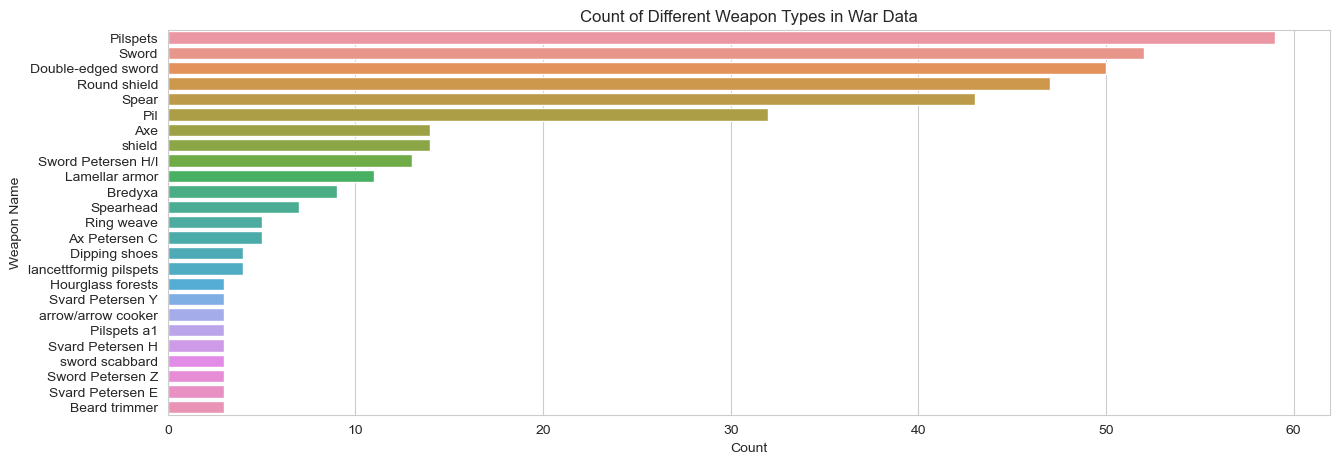

In [134]:
# Function to create plots with material frequency filtering
def create_filtered_plots(data, title, threshold):
    # Counting the occurrences of each material
    type_counts = data['Föremålsbenämning_translated'].value_counts()

    # Identifying materials with count >= threshold
    types_to_plot = type_counts[type_counts >= threshold].index

    # Filtering the data for plotting
    data_to_plot = data[data['Föremålsbenämning_translated'].isin(types_to_plot)]

    # Plotting
    plt.figure(figsize=(15, 5))
    sns.countplot(y=data_to_plot['Föremålsbenämning_translated'], order=data_to_plot['Föremålsbenämning_translated'].value_counts().index)
    plt.title(f'Count of Different Weapon Types in {title}')
    plt.xlabel('Count')
    plt.ylabel('Weapon Name')
    plt.show()

# Creating plots for the War Data with filtered materials
create_filtered_plots(war_df, 'War Data', threshold=3)